In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Make a plotting function to plot the decision boundary

def plot_decision_boundary(model, X, y):

  #Define the axis boundaries of the plot
  x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #Create X values (We're going to make predictions on these values)
  x_in = np.c_[xx.ravel(), yy.ravel()]#Stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_in)

  #check for multi-class classfication
  if len(y_pred[0])>1 :
    print ("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else :
    print ("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
#Make the confusion matrix prettier

def pretty_confusion_matrix(y_test, y_pred):

  figsize = (15, 15)

  #Create the confusion matrix
  cm = confusion_matrix(y_test, tf.math.round(y_pred))
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  #Lets now pretify it
  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  classes = class_names

  if classes : 
    labels = classes
  else : 
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title = "Confusion Matrix", 
        xlabel = "Predicted Lable",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  #Set x-axis lables to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust label sizes
  ax.yaxis.label.set_size(15)
  ax.xaxis.label.set_size(15)
  ax.title.set_size(15)

  #Set the threshold for differen colors
  threshold = (cm.max() + cm.min())/2

  #Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size = 10)

#Lets now work on multi-class classification

In [ ]:
#Lets work with the fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

#Data has already been split into training and testing splits
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Show the first training sample and label
print (f"the training data looks like : {train_data[0]}\n")
print (f"the training label looks like : {train_labels[0]}\n")

the training data looks like : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

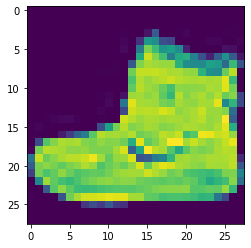

In [ ]:
#Plot a single sample
plt.imshow(train_data[0])

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
#Create a small list so that we can index the classes into human readable format
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneeker', 'Bag', 'Ankle Boot'] 
len(class_names)

10

Text(0.5, 1.0, 'Bag')

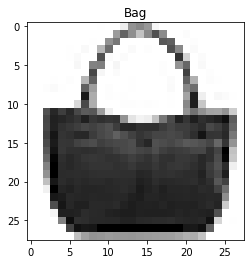

In [ ]:
#Now plot an example with their class name
index = 100
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

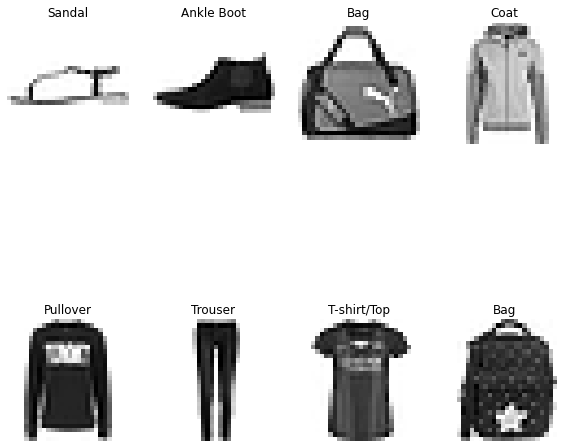

In [ ]:
#Plot multiple samples of fashion MNIST randomly
import random
plt.figure(figsize=(10,10))
for i in range(8):
  choice = random.choice(range(len(train_data)))
  ax = plt.subplot(2,4,i+1)
  plt.imshow(train_data[choice], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[choice]])
  plt.axis(False)

In [ ]:
#Build a multi-class classification model for now

#Set random seed
tf.random.set_seed(42)

#model
model1 = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile the model
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#Fit the model
non_norm_history = model1.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy:

**If the class labels are not one hot encoded, use loss=SparseCategoricalCrossentropy()
and if they are one hot encoded use loss=CategoricalCrossentropy()**

In [ ]:
#Check the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


###Now lets normalise the data and see if the moel does any better

In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
#We can get our training and testing data normalised (between 0 and 1) by dividing data by maximum
train_data_norm = train_data/255
test_data_norm = test_data/255

#Now check the min and max values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#model
model2 = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile the model
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#Fit the model
norm_history = model2.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))#Set random seed
tf.random.set_seed(42)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

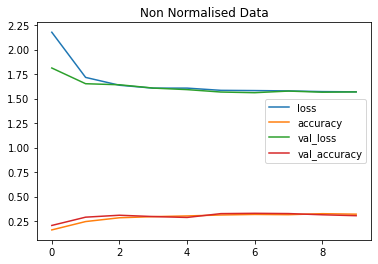

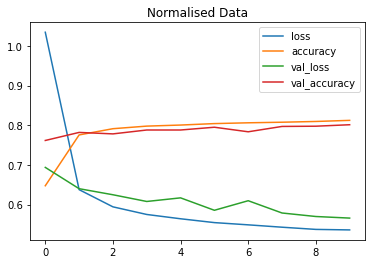

In [ ]:
#plot and compare the loss curves of both the models now with normalised and non-normalised data

import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title = 'Non Normalised Data')
pd.DataFrame(norm_history.history).plot(title = 'Normalised Data')

In [ ]:
#Set random seed
tf.random.set_seed(42)

#model
model3 = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile the model
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#Create the leraning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#Fit the model
find_lr_history = model3.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=40, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the optimum learning rate')

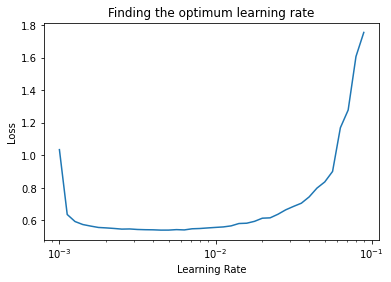

In [ ]:
#Plot learning rate decay curve

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the optimum learning rate')

Hence the ideal leraning rate turns out to be 0.001


In [ ]:
#set random seed
tf.random.set_seed(42)

#model
model4 = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(4, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile the model
model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

#Fit the model
optimized_lr_history = model4.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=20, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Now evaluating our multiclass classification model

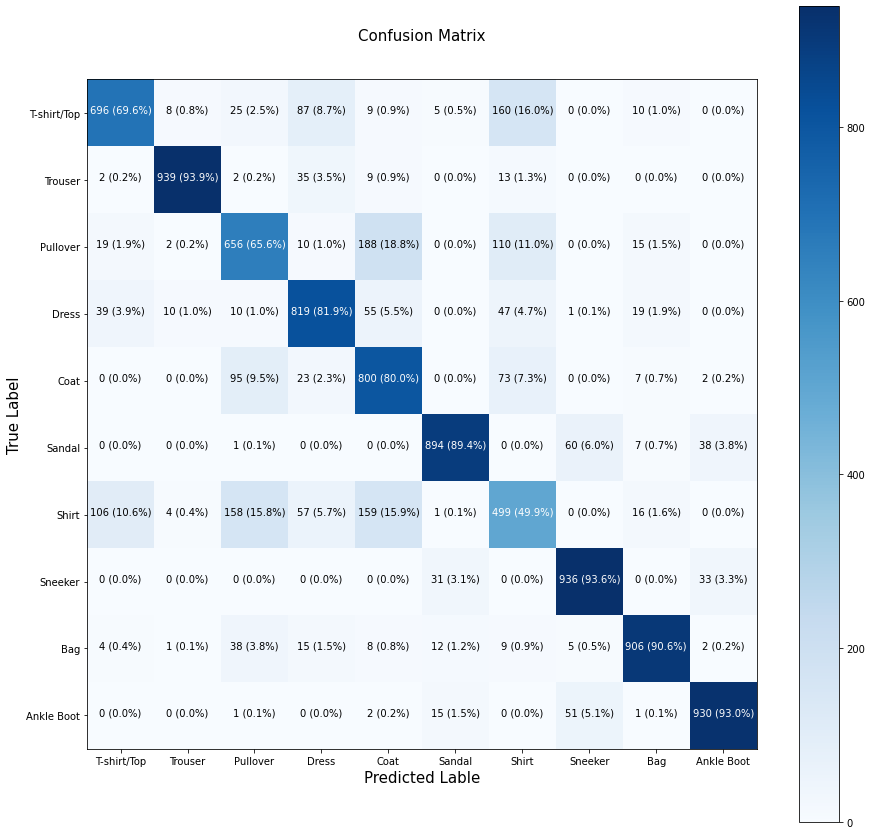

In [ ]:
pretty_confusion_matrix(y_test=test_labels, y_pred=tf.argmax(model4.predict(test_data_norm), axis=1))

Now lets visualise some random predictions

In [ ]:
def plot_random_predictions(model, images, true_labels, classes):
  #Set up random integer
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #Change the color of the title depending on correct or wrong predictions
  if pred_label == true_label:
    color='green'
  else:
    color='red'

  #Add xlabel information(prediction/true_label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color = color)

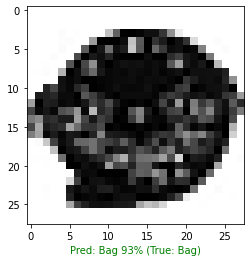

In [ ]:
plot_random_predictions(model=model4, images=test_data_norm, true_labels=test_labels, classes=class_names)

What patterns are our model actually learning

In [ ]:
#Fins the layers of our model4
model4.layers

In [ ]:
#extract a particular layer
model4.layers[1]

In [ ]:
#Get the patterns of a layer in our network
weights, biases = model4.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[ 0.7150268 , -0.06077147, -0.997631  , -1.0484309 ],
        [ 0.27732113, -0.47155517, -0.52916455,  0.02329266],
        [ 0.775243  ,  0.54027444, -1.1288565 , -0.7426149 ],
        ...,
        [-0.39453346,  0.47628713, -0.2264153 ,  0.25505945],
        [-0.40515667,  0.6181003 ,  0.23928398, -0.50387555],
        [ 0.23884527,  0.11606889, -0.12131356,  0.04352451]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([ 2.4485923e-02, -6.1530515e-04, -2.7230194e-01,  8.1124979e-01],
       dtype=float32), (4,))

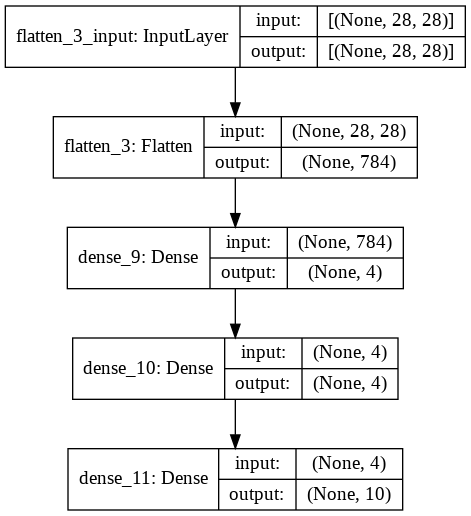

In [ ]:
#Now lets plot the model
from tensorflow.keras.utils import plot_model
plot_model(model4, show_shapes=True)